In [49]:
library(tidyverse)
library(ggpubr)
library(GGally)
library(yaml)
#library(Seurat)
#library(ggvenn)

#read config
config <- read_yaml(file = "./config.yaml")

#Common
DNA <- read_table2("../stat/dna.fq.stat",col_names=F) %>% arrange(X1) %>%rowwise()%>% mutate(X2 = X2/4*300/1000000000) %>% select(X2)

Raw <- read_table2("../stat/raw.fq.stat",col_names=F) %>% arrange(X1) %>% rowwise() %>% mutate(X2 = X2/4*300/1000000000,X1 = strsplit(X1,split = "/")[[1]][3]) %>% select(X2)
RNA <- read_table2("../stat/rna.fq.stat",col_names=F) %>% arrange(X1) %>% mutate(X2 = X2/4*300/1000000000) %>% select(X2)
raw_pairs <- read_table2("../stat/raw.pairs.stat",col_names=F) %>% arrange(X1) %>% select(X2)
pairs_dedup <- read_table2("../stat/pairs.dedup.stat",col_names=F) %>% arrange(X1) %>% select(X2)
pairs_c1 <- read_table2("../stat/pairs.c1.stat",col_names=F)%>% arrange(X1) %>% select(X2)
pairs_c12 <- read_table2("../stat/pairs.c12.stat",col_names=F)%>% arrange(X1) %>% select(X2)
inter_pairs_c12 <- read_table2(file = "../stat/inter.pairs.c12.stat",col_names = F) %>% arrange(X1) %>% select(X2)
RNAres <- read_table2("../result/RNA_Res/counts.gene.total.tsv")

featureStat <- cbind(as.data.frame(colSums(RNAres %>% select(-gene))),colSums(RNAres %>% select(-gene) != 0))
names(featureStat) <- c("UMIs","genes")
RNAresExon <- read_table2("../result/RNA_Res/counts.exon.total.tsv")

featureStatExon <- cbind(as.data.frame(colSums(RNAresExon %>% select(-gene))),colSums(RNAresExon %>% select(-gene) != 0))
names(featureStatExon) <- c("UMIs","genes")

#stat <- cbind(DNA,Raw,RNA,raw_pairs,pairs_dedup,pairs_c1,pairs_c12,inter_pairs_c12,featureStat)
#names(stat) <- c("cell_name","DNAreads","Rawreads","RNAreads","raw_pairs","pairs_dedup","pairs_clean1","pairs_clean2","inter_pairs_clean2","UMIs_gene","genes_gene")
RNAresGenome1 <- read_table2("../result/RNA_Res/counts.gene.genome1.tsv")
RNAresGenome2 <- read_table2("../result/RNA_Res/counts.gene.genome2.tsv")
featureStatGenome1 <- cbind(as.data.frame(colSums(RNAresGenome1 %>% select(-gene))),colSums(RNAresGenome1 %>% select(-gene) != 0))
featureStatGenome2 <- cbind(as.data.frame(colSums(RNAresGenome2 %>% select(-gene))),colSums(RNAresGenome2 %>% select(-gene) != 0))
RNAstat <- cbind(featureStat,featureStatGenome1,featureStatGenome2)

yperx <- read_table2("../stat/yperx.stat",col_names=F) %>% arrange(X1) %>% select(X2)

stat <- cbind(Raw,DNA,RNA,yperx,raw_pairs,pairs_dedup,pairs_c1,pairs_c12,inter_pairs_c12,RNAstat)
names(stat) <- c("Rawreads","DNAreads","RNAreads","yperx","raw_pairs","pairs_dedup","pairs_clean1","pairs_clean2","inter_pairs_clean2",
                 "UMIs_gene","genes_gene","UMIs_gene_genome1","genes_gene_genome1","UMIs_gene_genome2","genes_gene_genome2")

if(config$if_structure){
    rmsd <- read_table2("../stat/rmsd.info",col_names = c("cellname","TOP_3_RMSD")) %>% arrange(cellname) %>% select(TOP_3_RMSD)
    stat <- cbind(stat,rmsd)
}
if(config$if_cuttag){
    CT <- read_table2("../stat/ct.stat",col_names=c("cellname","CTreads")) %>% arrange(cellname)  %>% mutate(CTreads = CTreads/4) %>% select(CTreads)
    CTfrag <- read_table2("../stat/ct.frag.stat",col_names=c("cellname","CTfrags")) %>% arrange(cellname) %>% select(CTfrags)
    stat<-cbind(stat,CT,CTfrag)
}


── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double()
)



── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double()
)



── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double()
)



── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double()
)



── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [20]:
plot <- stat %>% mutate(RNAreadsRatio = RNAreads/(RNAreads+DNAreads),
                        pairsPerRead = raw_pairs/DNAreads/1000000000*300,
                        pairsValidRatio = pairs_clean2/raw_pairs,
                        interPairsRatio = inter_pairs_clean2/pairs_clean2) %>%
                rownames_to_column("cellname")


In [23]:
plot 

cellname,Rawreads,DNAreads,RNAreads,yperx,raw_pairs,pairs_dedup,pairs_clean1,pairs_clean2,inter_pairs_clean2,⋯,genes_gene,UMIs_gene_genome1,genes_gene_genome1,UMIs_gene_genome2,genes_gene_genome2,TOP_3_RMSD,RNAreadsRatio,pairsPerRead,pairsValidRatio,interPairsRatio
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ESC2i009,1.817191,1.618873,0.1698930,0.63,755982,446988,446988,374518,38555,⋯,6854,6109,3062,5454,2779,9.6287853,0.09497776,0.1400941,0.4954060,0.10294565
ESC2i010,3.934255,3.667915,0.2293812,0.27,1920083,749523,749523,663495,129688,⋯,7244,7589,3420,6744,3109,0.5260926,0.05885649,0.1570442,0.3455554,0.19546191
ESC2i011,4.214221,4.026447,0.1603284,0.36,2055822,692933,692933,607605,107691,⋯,6795,6657,3256,5685,2882,3.8981994,0.03829401,0.1531739,0.2955533,0.17723850
ESC2i012,2.482906,2.317258,0.1412733,0.28,1071508,473169,473169,401966,39845,⋯,7040,6935,3343,5841,2976,9.7873649,0.05746248,0.1387210,0.3751405,0.09912530
ESC2i013,3.020055,2.825367,0.1651893,0.23,1363428,612466,612466,532664,61692,⋯,6385,5609,2784,5114,2627,9.8939070,0.05523697,0.1447700,0.3906800,0.11581785
ESC2i014,3.592557,3.315973,0.2381994,0.29,1499675,667269,667269,582348,57878,⋯,7560,8114,3584,6716,3168,0.7868219,0.06701965,0.1356774,0.3883161,0.09938731
ESC2i015,2.773666,2.587873,0.1590384,0.24,1269348,582748,582748,502939,69444,⋯,6042,4922,2563,4188,2328,1.1767900,0.05789718,0.1471496,0.3962184,0.13807639
ESC2i016,5.193909,4.970551,0.1899768,0.06,2276175,789781,789781,711768,204675,⋯,6149,7626,3106,3548,1989,3.2367217,0.03681345,0.1373796,0.3127035,0.28755859
ESC2i017,3.107311,2.869916,0.2051508,0.20,1164238,674594,674594,587935,77092,⋯,7511,8971,3709,7334,3243,4.6272204,0.06671425,0.1217009,0.5049955,0.13112334


In [22]:
plot %>% summary()

   cellname            Rawreads        DNAreads         RNAreads      
 Length:183         Min.   :1.030   Min.   :0.9807   Min.   :0.02004  
 Class :character   1st Qu.:2.340   1st Qu.:2.1736   1st Qu.:0.11549  
 Mode  :character   Median :3.110   Median :2.8996   Median :0.16295  
                    Mean   :3.303   Mean   :3.1053   Mean   :0.16845  
                    3rd Qu.:4.184   3rd Qu.:3.9445   3rd Qu.:0.19988  
                    Max.   :7.926   Max.   :7.7700   Max.   :0.53768  
     yperx          raw_pairs        pairs_dedup       pairs_clean1    
 Min.   :0.0400   Min.   : 420867   Min.   : 156634   Min.   : 156634  
 1st Qu.:0.2500   1st Qu.: 985226   1st Qu.: 424501   1st Qu.: 424501  
 Median :0.2800   Median :1269006   Median : 499092   Median : 499092  
 Mean   :0.2879   Mean   :1331708   Mean   : 525324   Mean   : 525324  
 3rd Qu.:0.3050   3rd Qu.:1714621   3rd Qu.: 616443   3rd Qu.: 616443  
 Max.   :0.9900   Max.   :2861148   Max.   :1002488   Max.   :1002488  

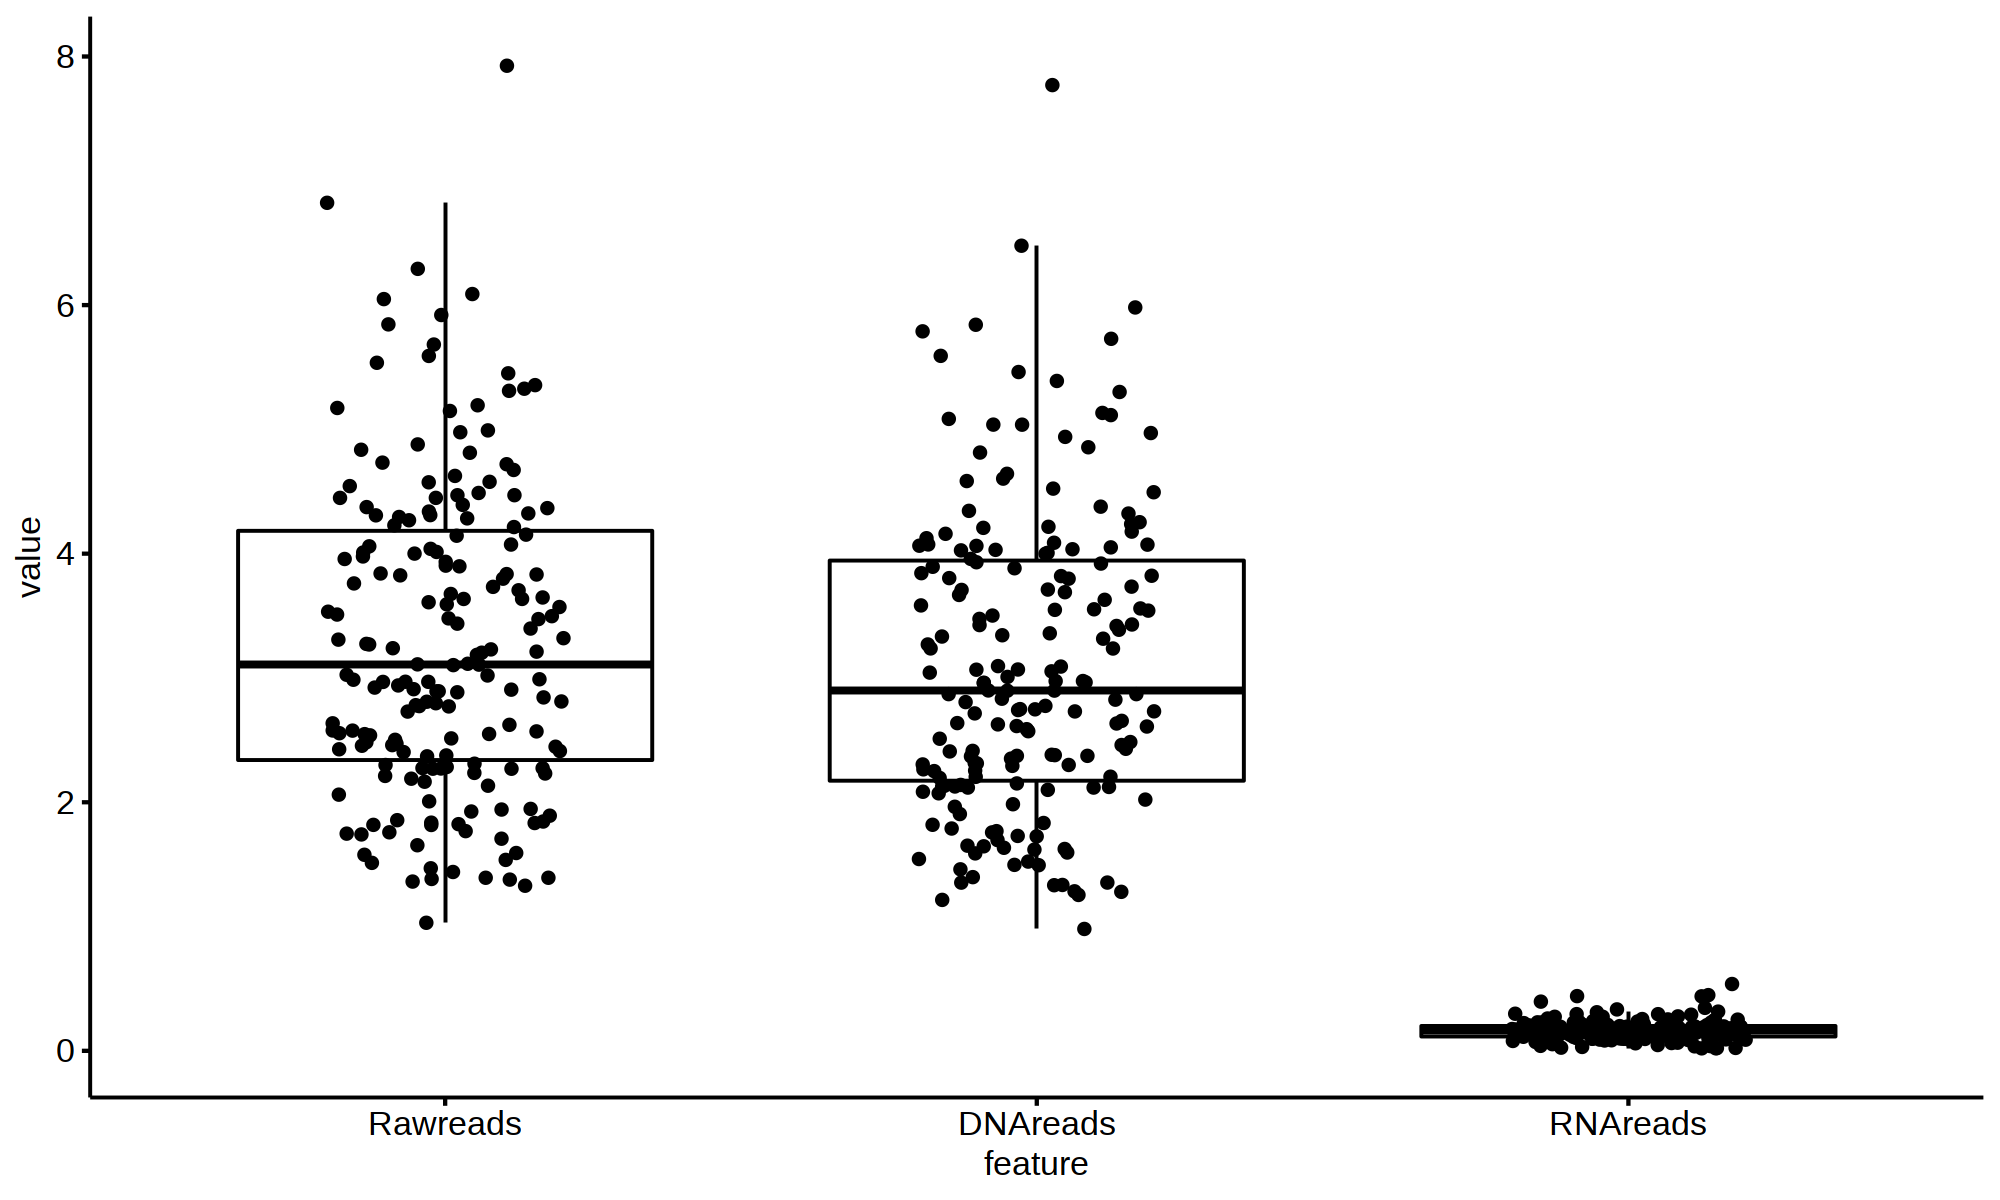

In [39]:
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 200)
plot %>% gather(feature,value,everything(),-cellname) %>% filter(feature %in% c("Rawreads","DNAreads","RNAreads")) %>% ggboxplot(x="feature",y="value",add = "jitter")

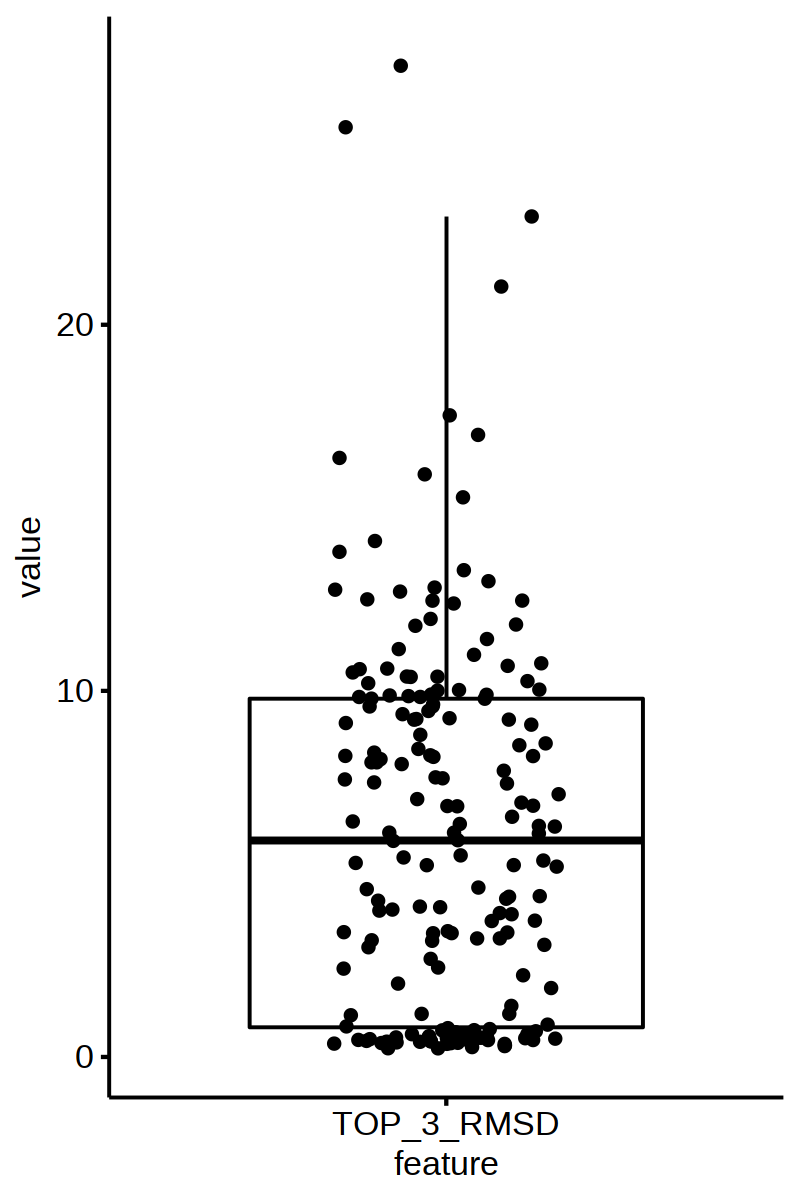

In [42]:
options(repr.plot.width = 4, repr.plot.height = 6, repr.plot.res = 200)
plot %>% gather(feature,value,everything(),-cellname) %>% filter(feature %in% c("TOP_3_RMSD")) %>% ggboxplot(x="feature",y="value",add = "jitter")

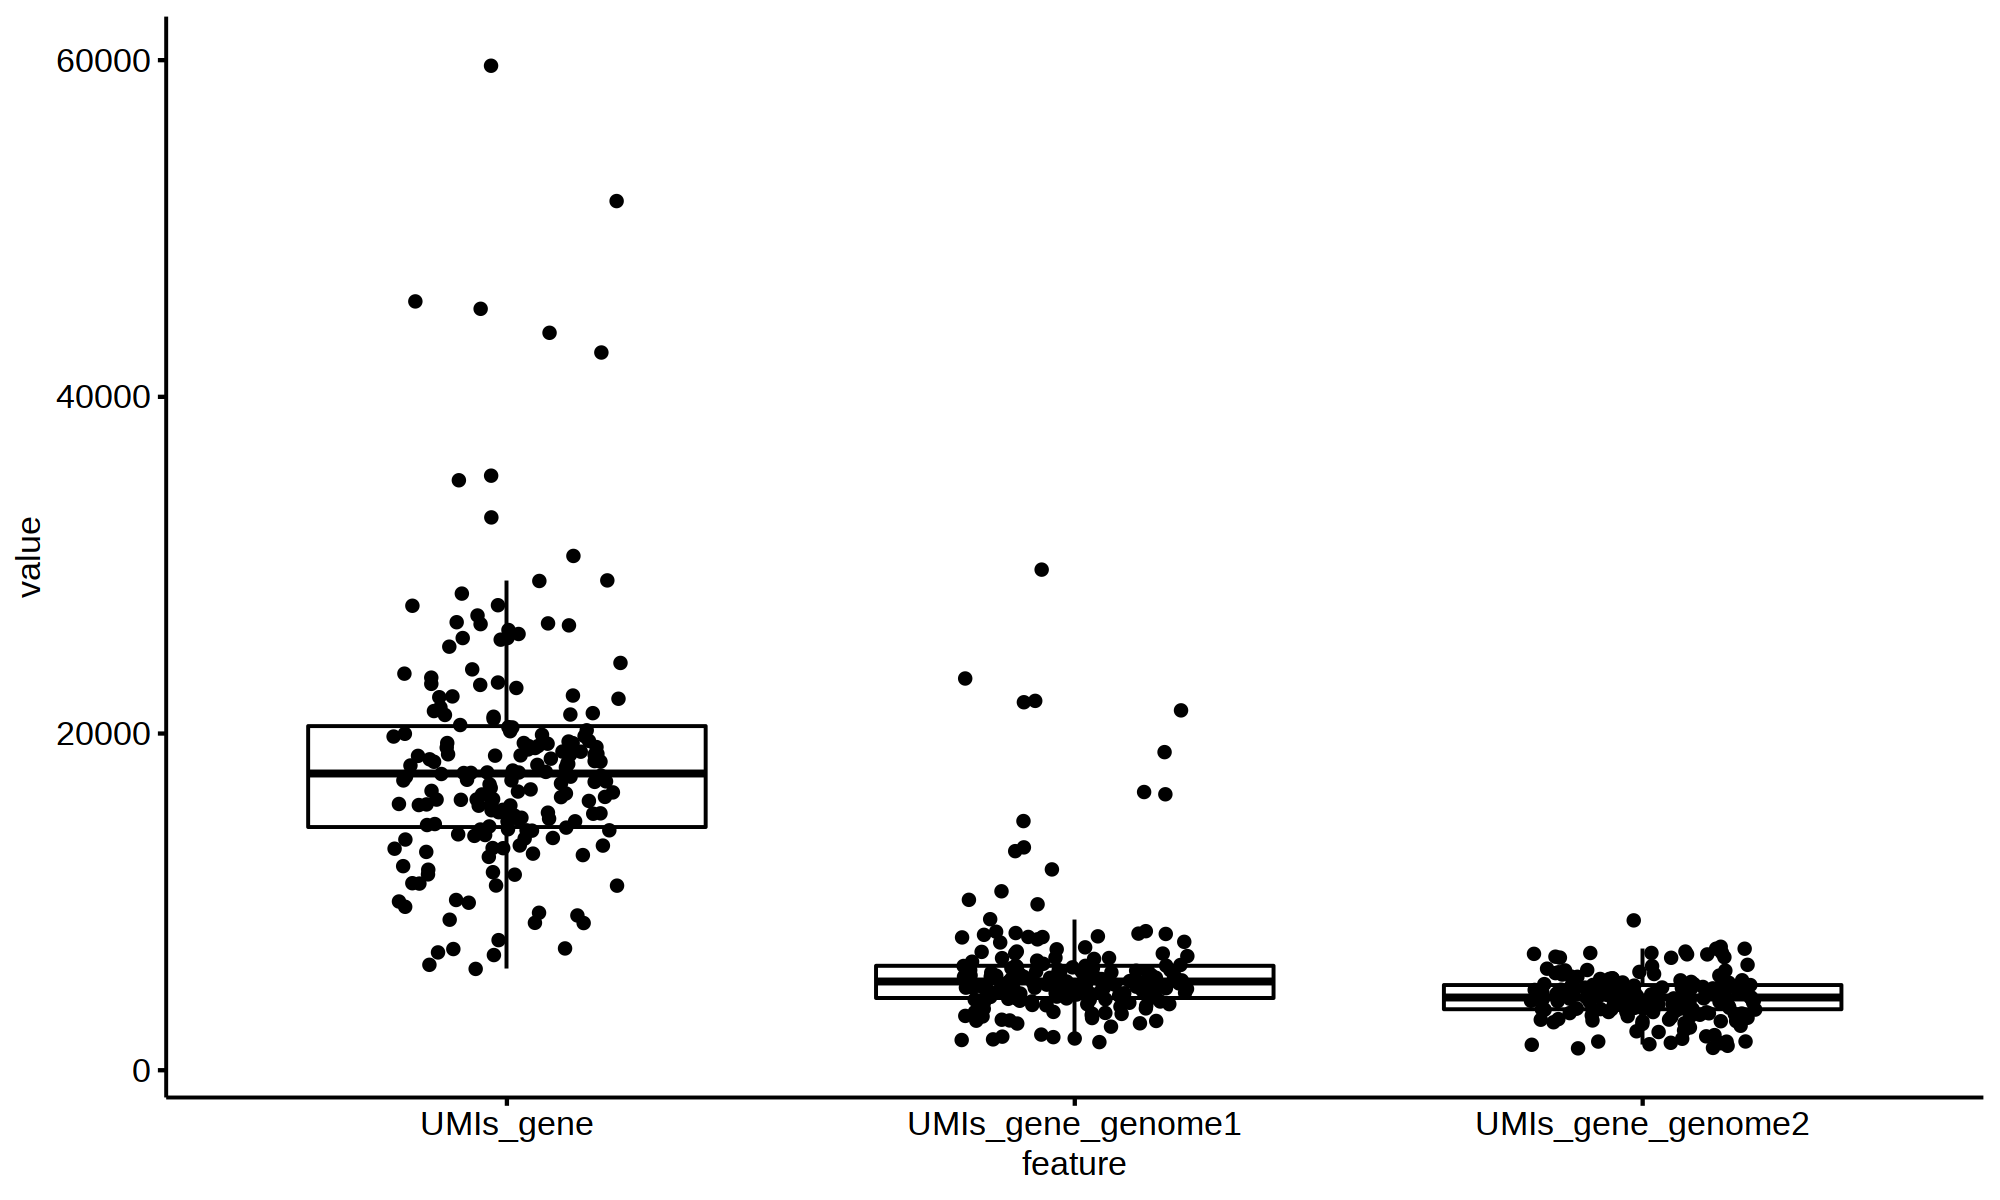

In [44]:
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 200)
plot %>% gather(feature,value,everything(),-cellname) %>% filter(feature %in% c( "UMIs_gene","UMIs_gene_genome1","UMIs_gene_genome2")) %>% ggboxplot(x="feature",y="value",add = "jitter")

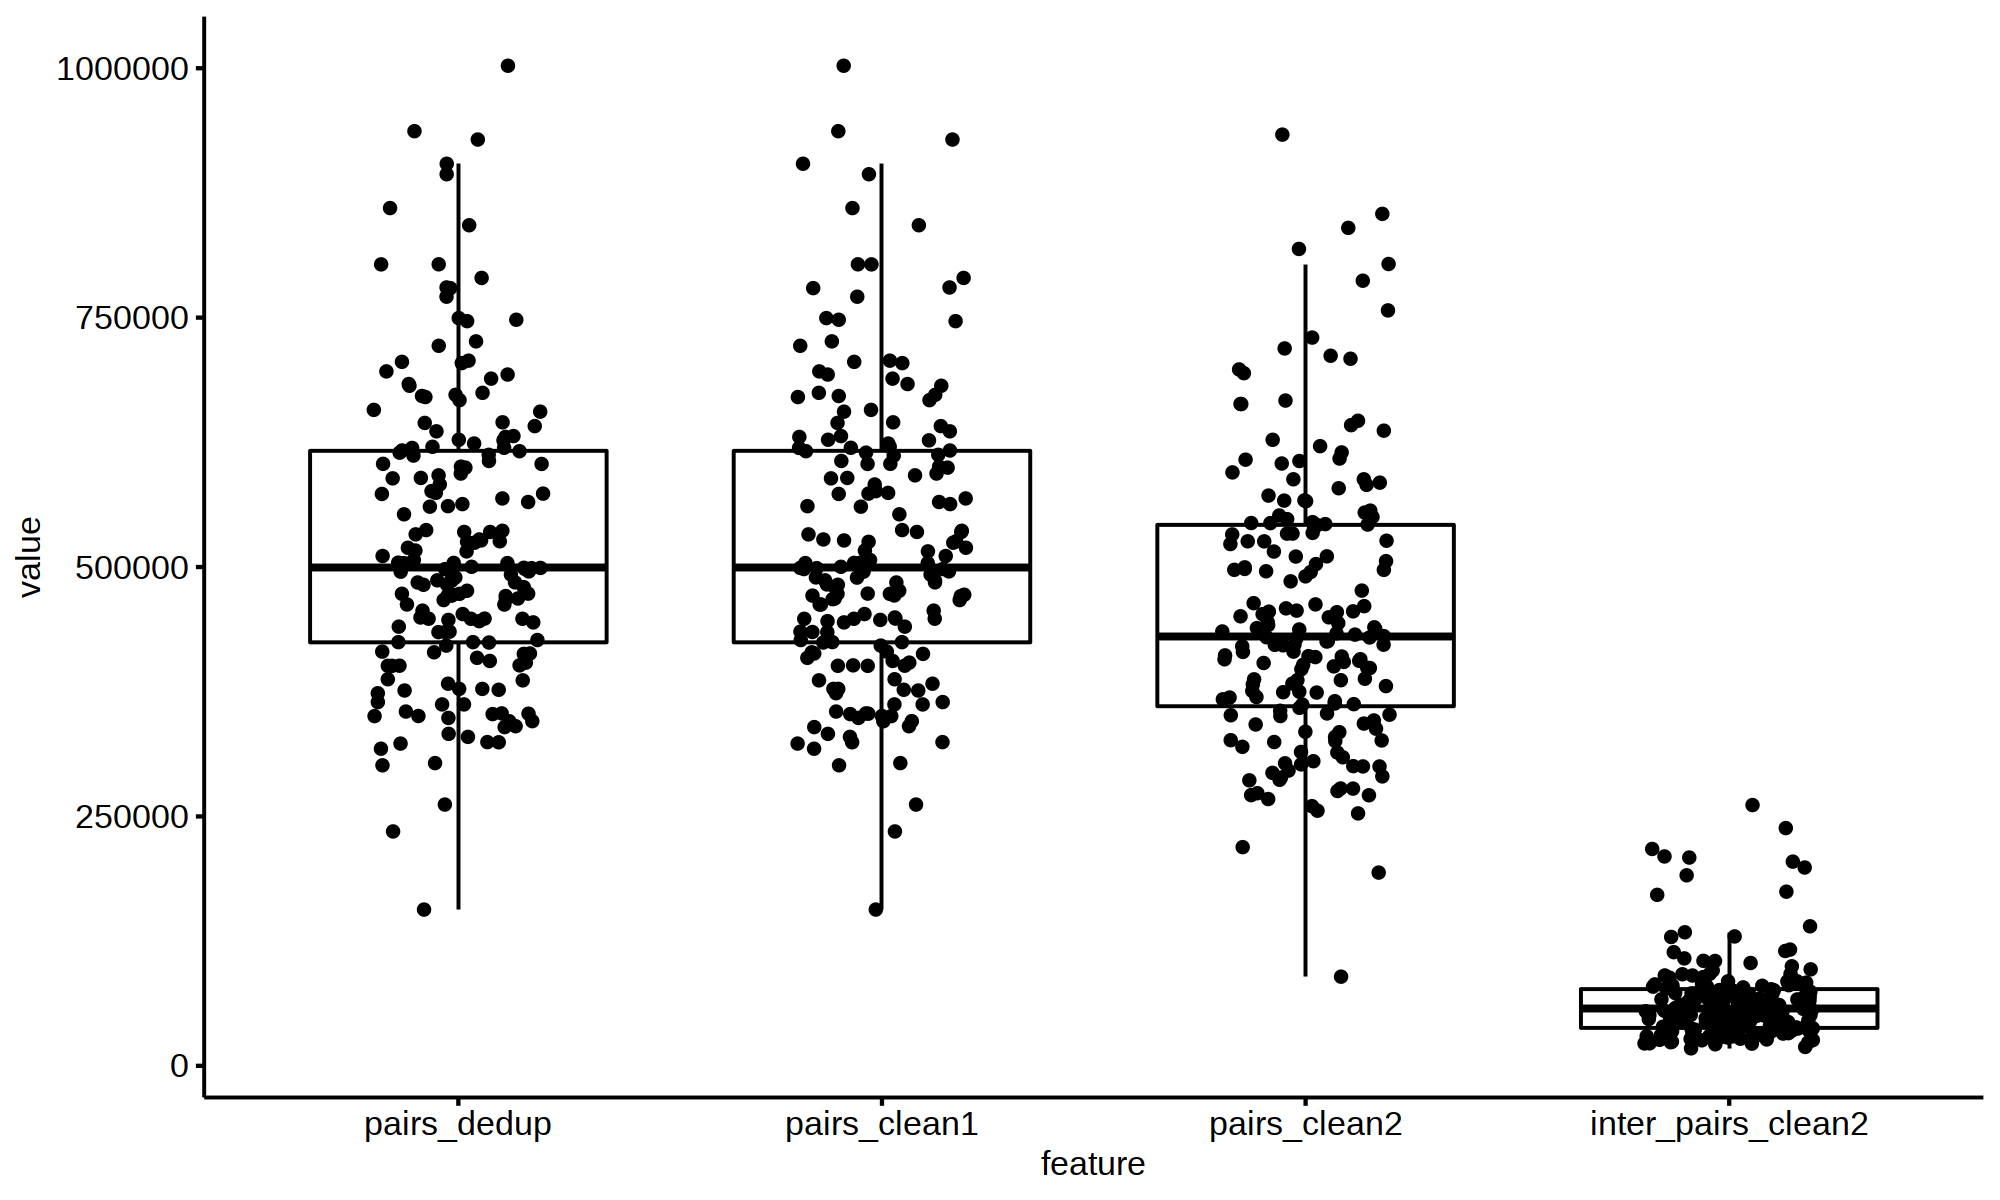

In [45]:
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 200)
plot %>% gather(feature,value,everything(),-cellname) %>% filter(feature %in% c("pairs_dedup","pairs_clean1","pairs_clean2","inter_pairs_clean2")) %>% ggboxplot(x="feature",y="value",add = "jitter")

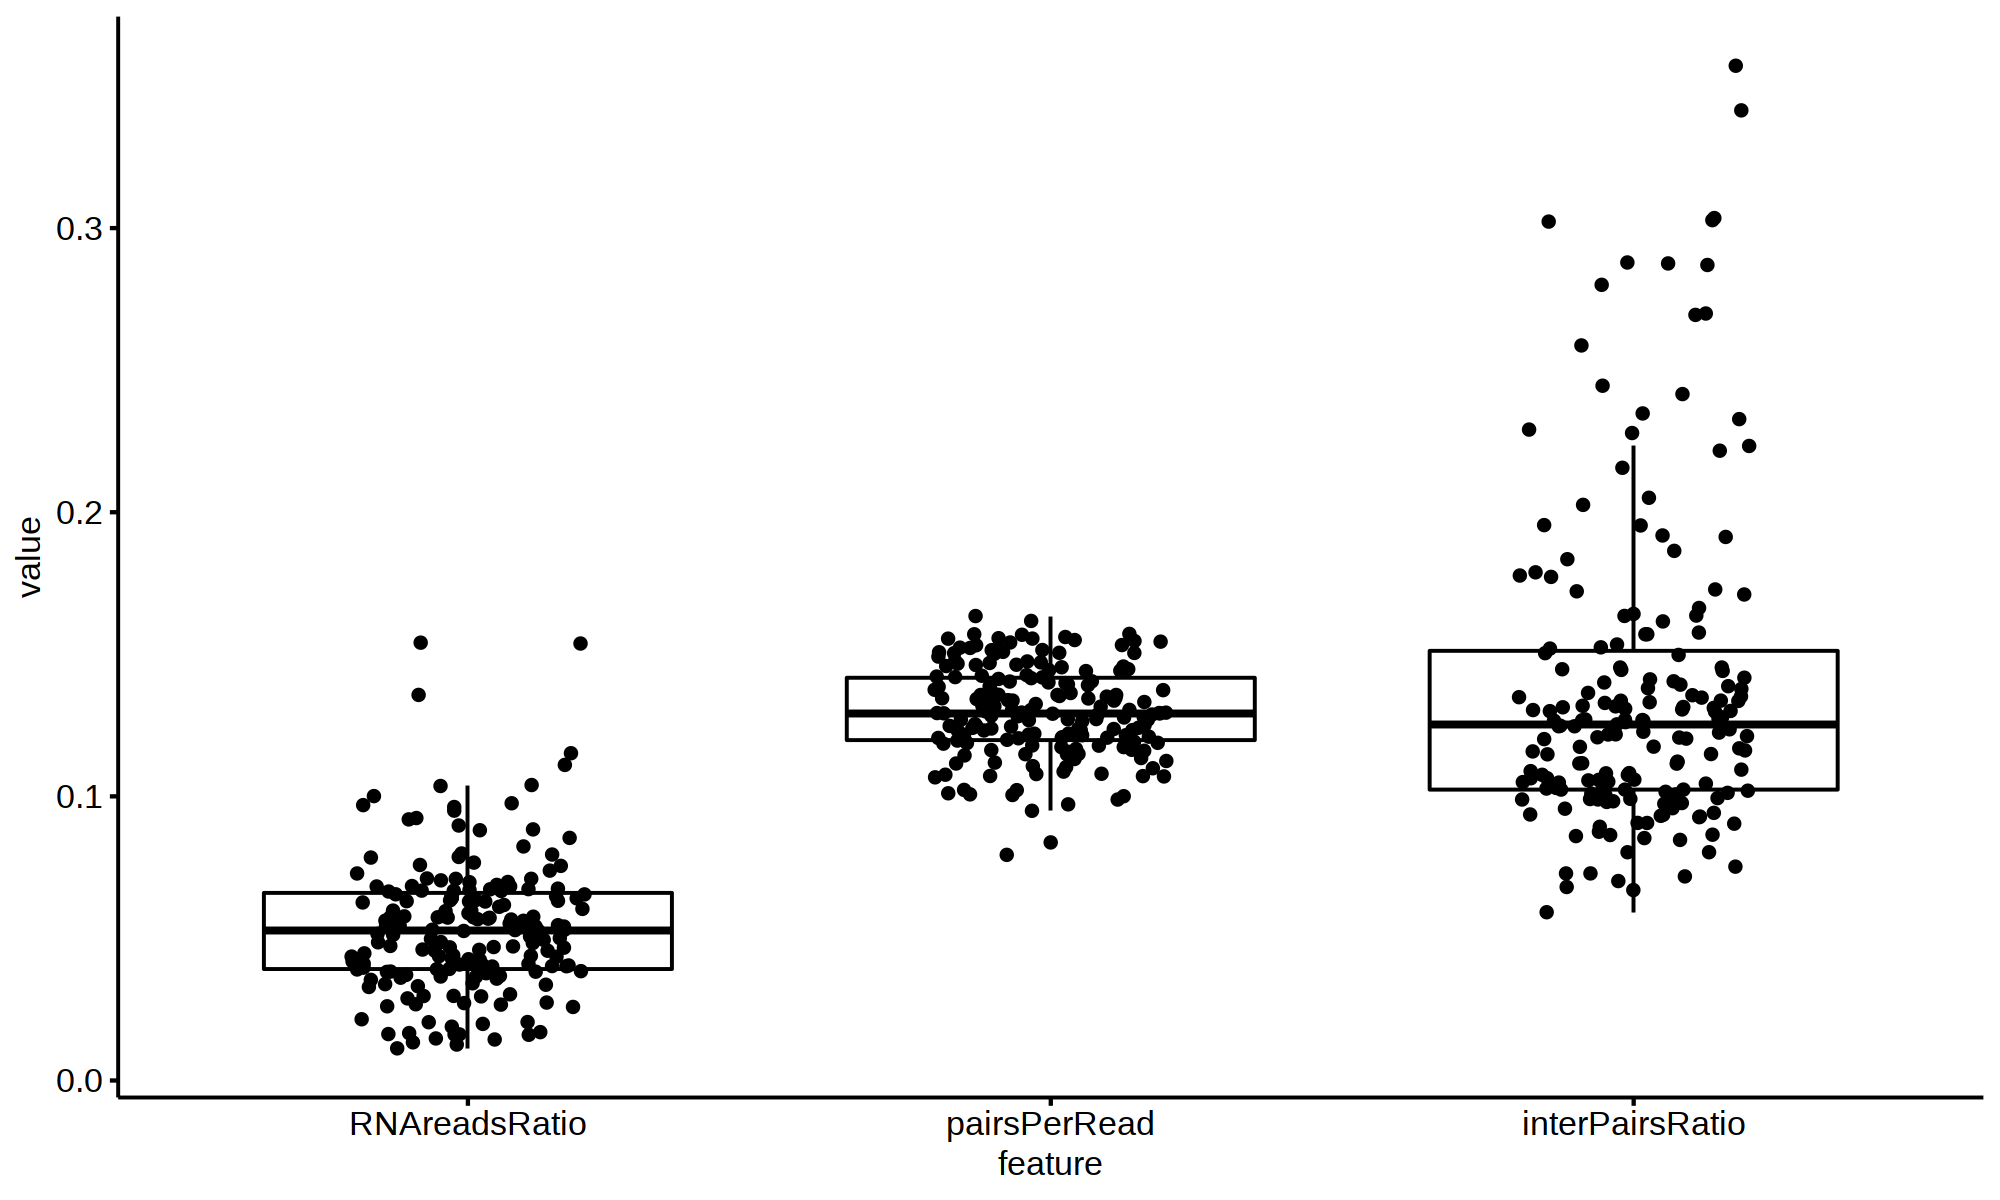

In [48]:
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 200)
plot %>% gather(feature,value,everything(),-cellname) %>% filter(feature %in% c("RNAreadsRatio","pairsPerRead","interPairsRatio")) %>% ggboxplot(x="feature",y="value",add = "jitter")

Warning message in ggcorr(RNAres, legend.size = 14, method = c("everything", "pearson"), :
“data in column(s) 'gene' are not numeric and were ignored”


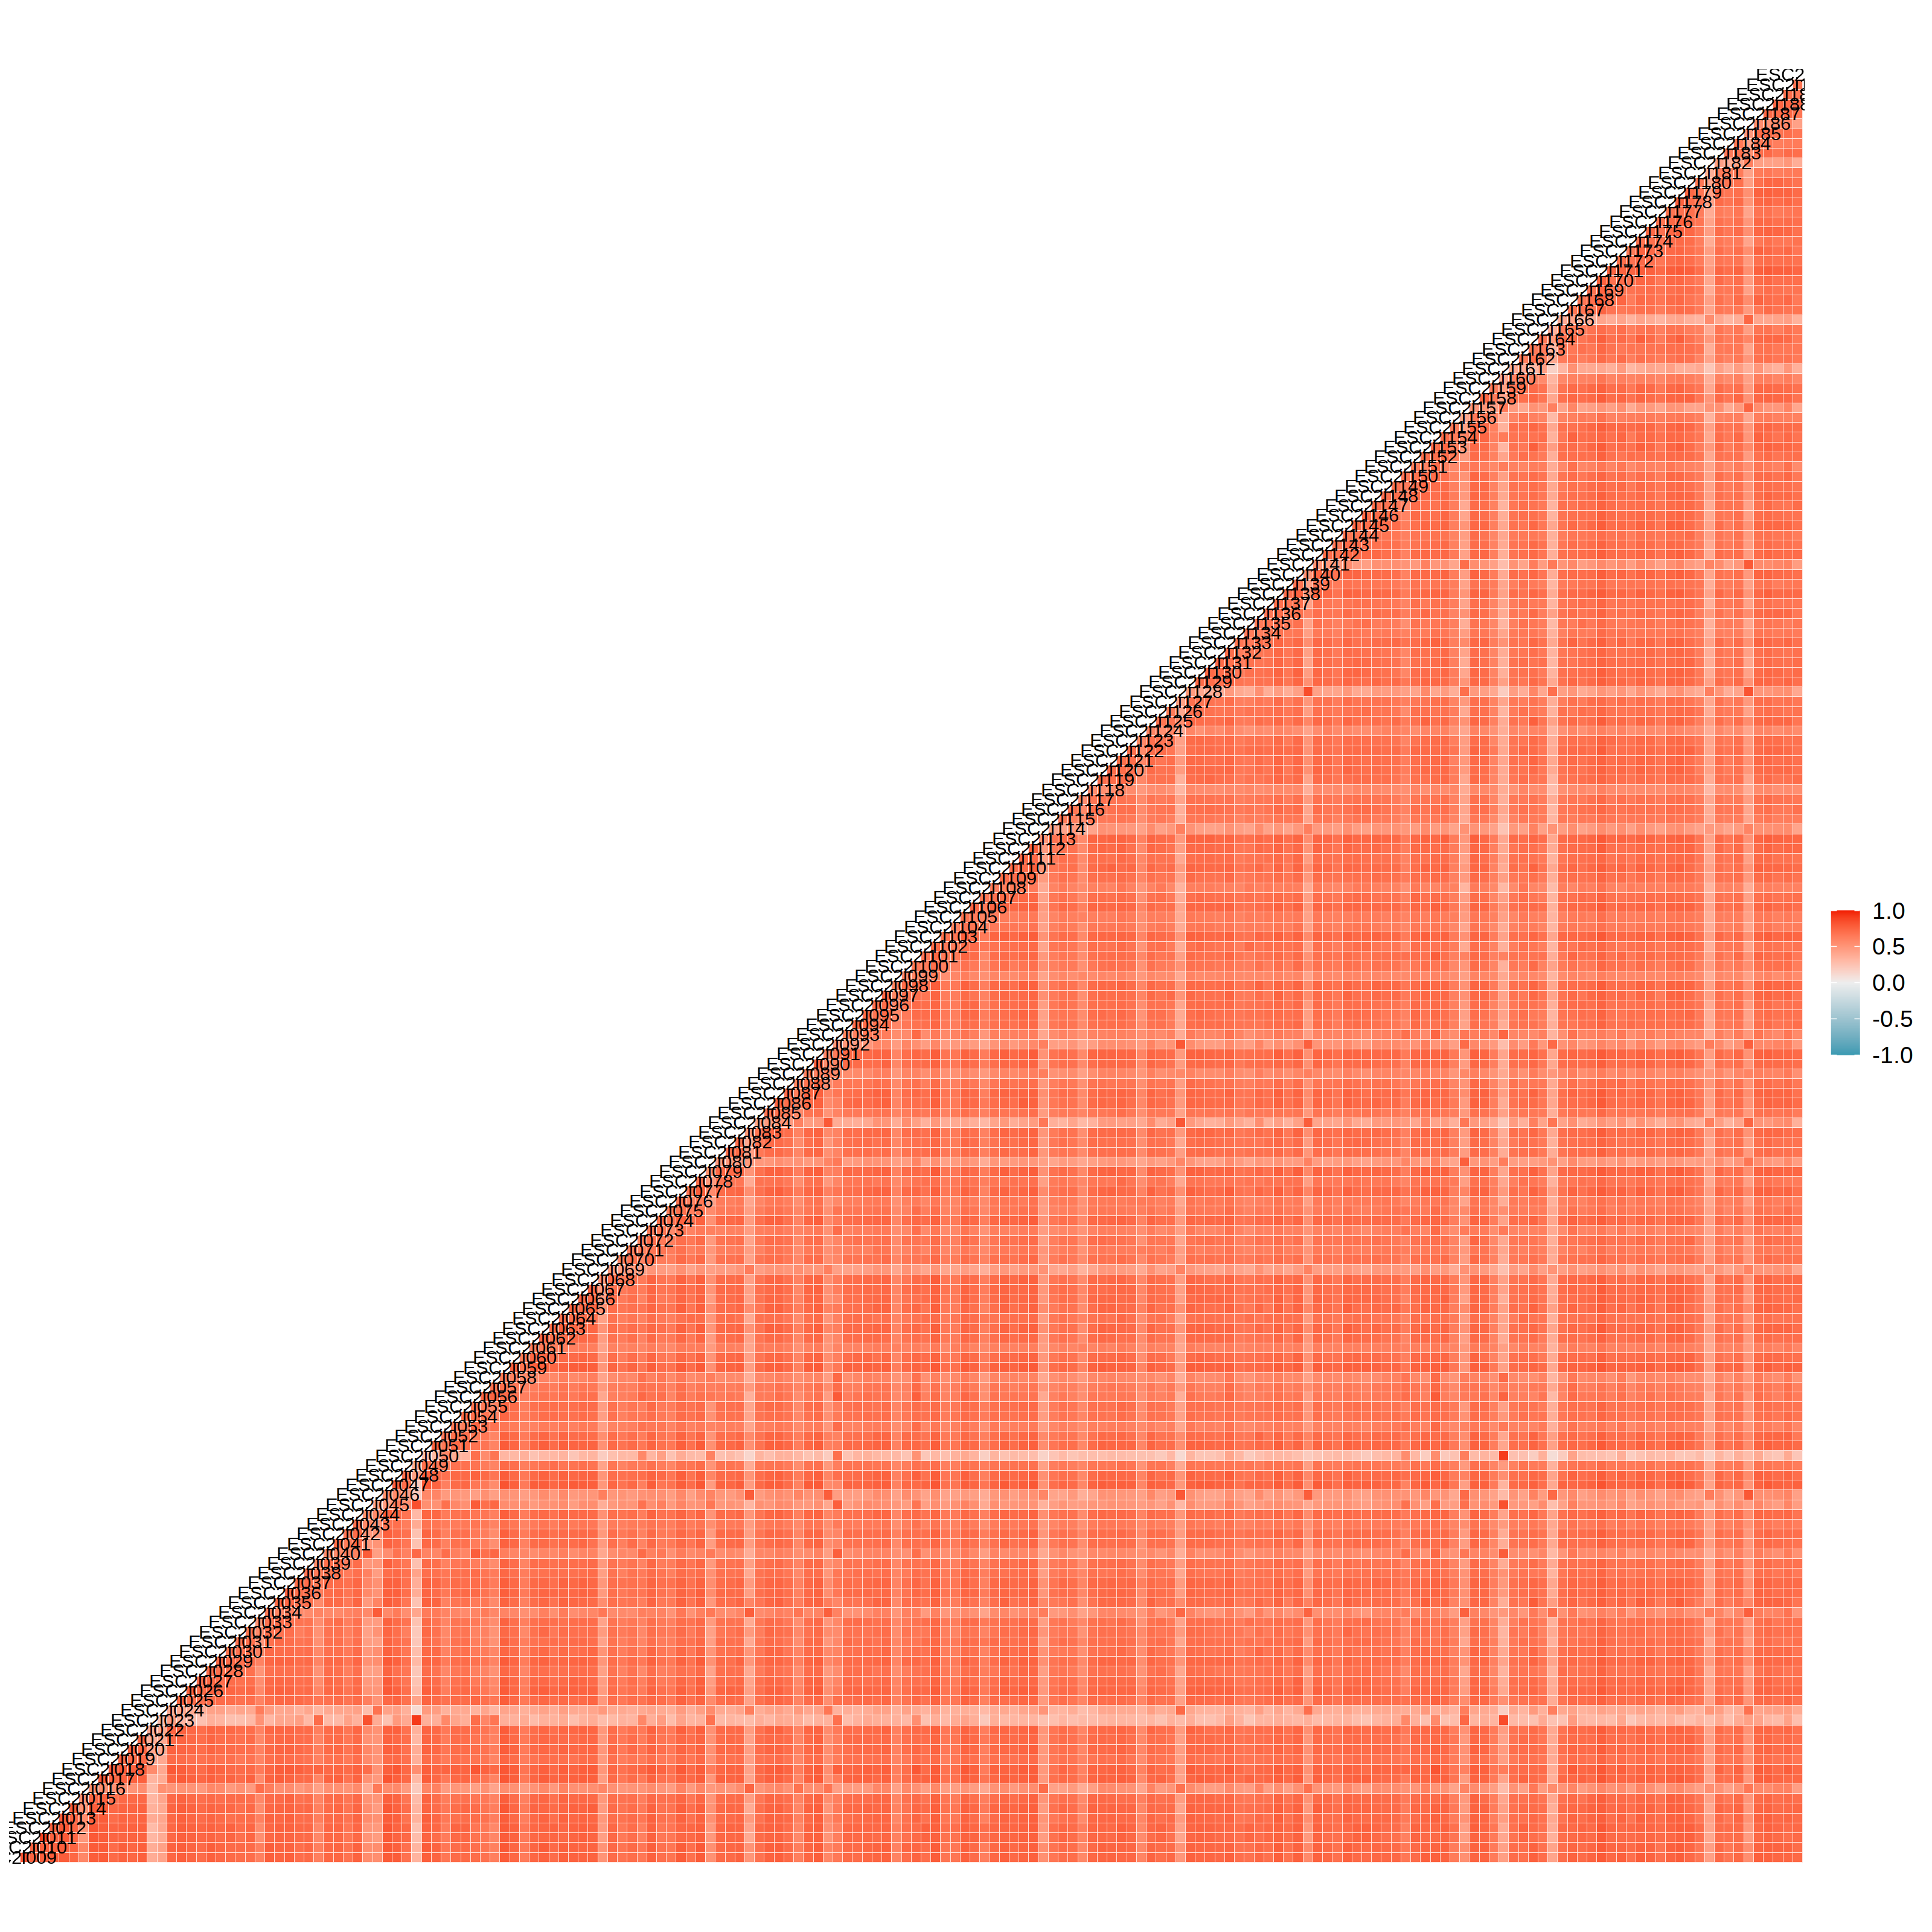

In [26]:
options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res = 200)
ggcorr(RNAres,legend.size=14,method = c("everything","pearson"),label=F,label_round=3) 